# Univariate Linear Regression on the California Housing Prices Dataset
---

## Goal of this Report
Analyze and model the relationship between median house value (dependent variable) and three possible independent variables: median income, population, and number of households.

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import seaborn as sns


In [154]:
df = pd.read_csv('housing.csv')
df.shape

(20640, 10)

## Exploratory Data Analysis

In [155]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [156]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Seaborn scatter plots

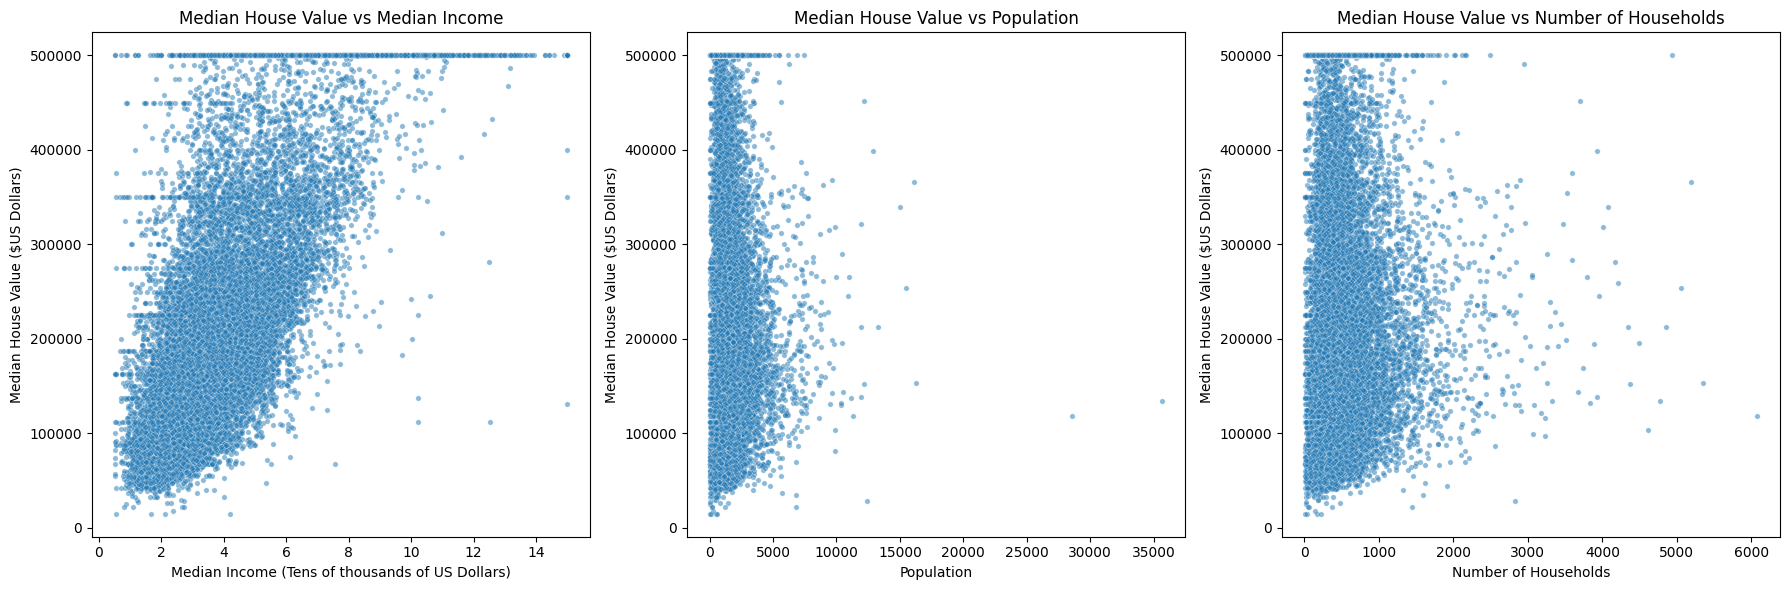

In [157]:
# Three seaborn scatter plots of median house value vs median income, population and number of households
plt.figure(figsize=(18, 6))

# Median House Value vs Median Income, First Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income (Tens of thousands of US Dollars)')
plt.ylabel('Median House Value ($US Dollars)')

# Median House Value vs Population, Second Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value ($US Dollars)')

# Median House Value vs Number of Households, Third Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value ($US Dollars)')

plt.tight_layout()
plt.show()

### Notice 
1. The **Median House Values** appears to be limited to $500K US dollars, perhaps the majority of **Median House Values** in this survey only supply up to $500K.
2. Obviously, the **Median House Values** and **Median Income** show a positive correlation trend.
3. The **Population** and **Households** concentrate at 0~5000 and 0~2000, respectively. However, they do not have an apparent relationship with the **Median House Values** in scatter plots.

## Preprocessing

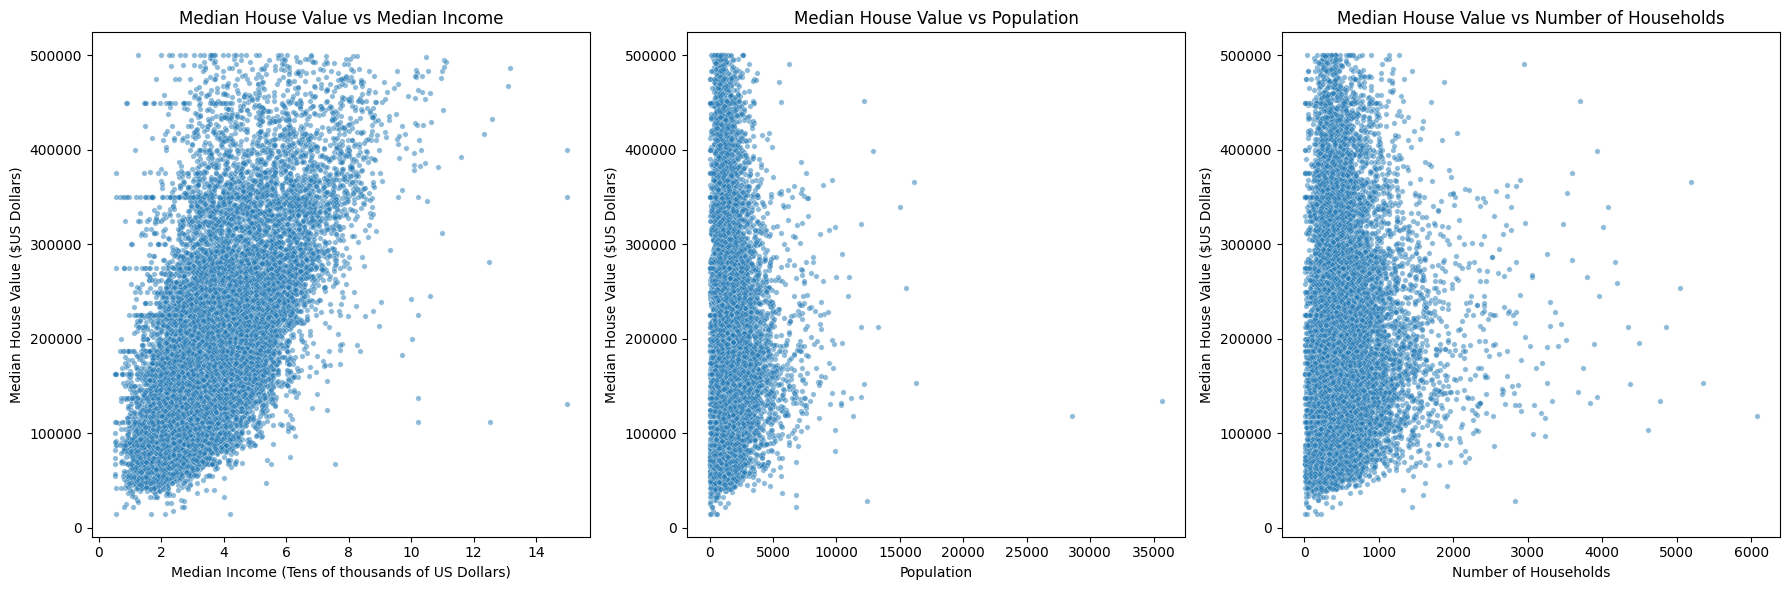

In [158]:
df = df[df.median_house_value != 500001]

# Three seaborn scatter plots of median house value vs median income, population and number of households
plt.figure(figsize=(18, 6))

# Median House Value vs Median Income, First Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income (Tens of thousands of US Dollars)')
plt.ylabel('Median House Value ($US Dollars)')

# Median House Value vs Population, Second Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value ($US Dollars)')

# Median House Value vs Number of Households, Third Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.5, s=15)
plt.title('Median House Value vs Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value ($US Dollars)')

plt.tight_layout()
plt.show()

## Fitting Linear Regression

In [159]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

# Use the first 80%
train_size = int(len(df) * 0.8)
train = df[:train_size]
# Fitting the median income model
model_income = model1.fit(train[['median_income']], train['median_house_value'])
model_income_intercept = model_income.intercept_
model_income_slope = model_income.coef_[0]
model_income_mse = metrics.mean_squared_error(train['median_house_value'], model_income.predict(train[['median_income']]))
model_income_mae = metrics.mean_absolute_error(train['median_house_value'], model_income.predict(train[['median_income']]))

# Fitting the population model
model_population = model2.fit(train[['population']], train['median_house_value'])
model_population_intercept = model_population.intercept_
model_population_slope = model_population.coef_[0]
model_population_mse = metrics.mean_squared_error(train['median_house_value'], model_population.predict(train[['population']]))
model_population_mae = metrics.mean_absolute_error(train['median_house_value'], model_population.predict(train[['population']]))

# Fitting the households model
model_households = model3.fit(train[['households']], train['median_house_value'])
model_households_intercept = model_households.intercept_
model_households_slope = model_households.coef_[0]
model_households_mae = metrics.mean_absolute_error(train['median_house_value'], model_households.predict(train[['households']]))
model_households_mse = metrics.mean_squared_error(train['median_house_value'], model_households.predict(train[['households']]))

table = pd.DataFrame({
    'Model' : ['Median Income', 'Population', 'Number of Households'],
    'Intercept' : [model_income_intercept, model_population_intercept, model_households_intercept],
    'Slope' : [model_income_slope, model_population_slope, model_households_slope],
    'MSE' : [model_income_mse, model_population_mse, model_households_mse],
    'MAE' : [model_income_mae, model_population_mae, model_households_mae]
})

table

,Model,Intercept,Slope,MSE,MAE
0,Median Income,48204.534368,38702.972338,5.557954e+09,55839.998641
1,Population,188081.588626,0.328630,9.236186e+09,75879.526606
2,Number of Households,177147.288538,22.625726,9.156895e+09,75463.106515


## Resulting Line on Top of the Scatter 

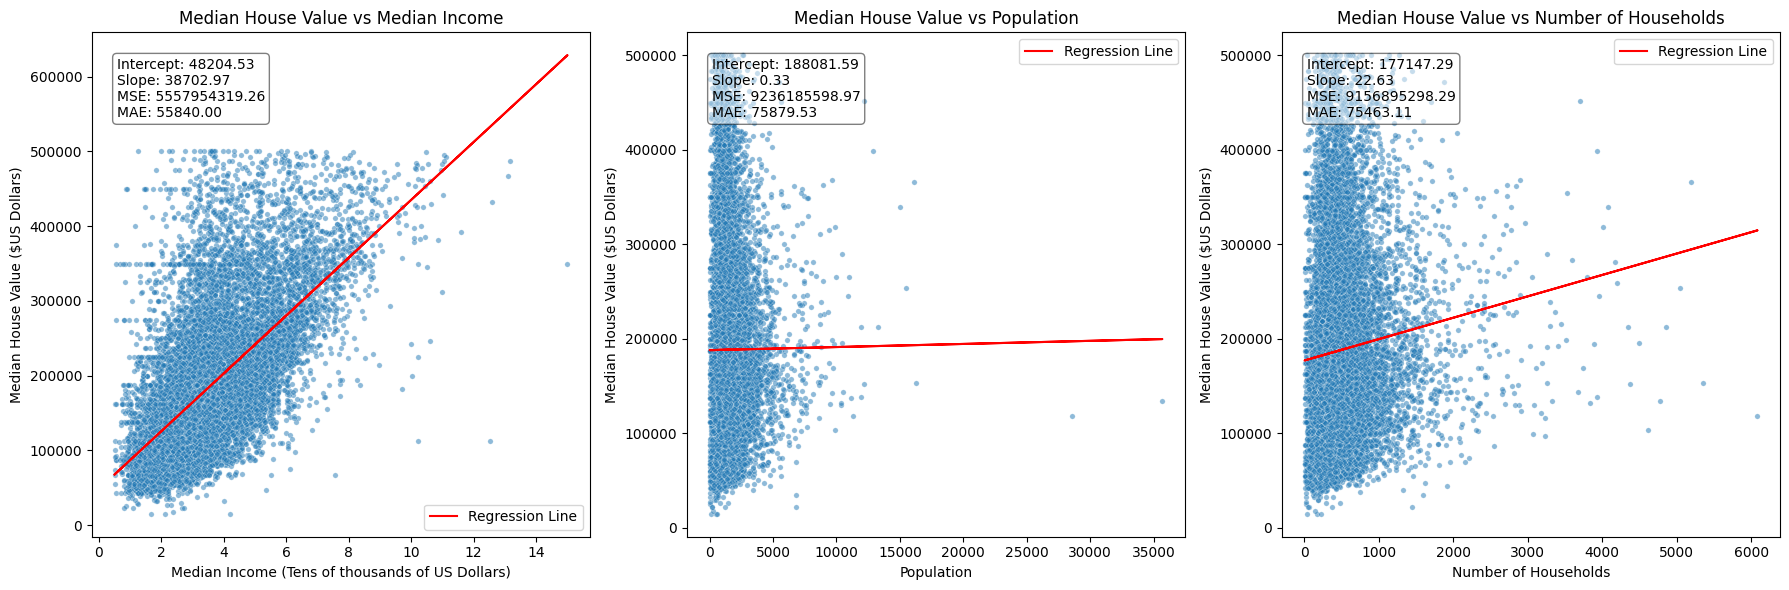

In [160]:
# Three seaborn scatter plots of median house value vs median income, population and number of households
plt.figure(figsize=(18, 6))

# Median House Value vs Median Income, First Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=train, alpha=0.5, s=15)
# Regression Line
plt.plot(train['median_income'], model_income.predict(train[['median_income']]), color='red', label='Regression Line')
# Text box
text = f"Intercept: {model_income_intercept:.2f}\n"
text += f"Slope: {model_income_slope:.2f}\n"
text += f"MSE: {model_income_mse:.2f}\n"
text += f"MAE: {model_income_mae:.2f}"

plt.text(
    x=0.05,
    y=0.95,
    s=text,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income (Tens of thousands of US Dollars)')
plt.ylabel('Median House Value ($US Dollars)')
plt.legend()

# Median House Value vs Population, Second Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=train, alpha=0.5, s=15)
# Regression Line
plt.plot(train['population'], model_population.predict(train[['population']]), color='red', label='Regression Line')
# Text box
text = f"Intercept: {model_population_intercept:.2f}\n"
text += f"Slope: {model_population_slope:.2f}\n"
text += f"MSE: {model_population_mse:.2f}\n"
text += f"MAE: {model_population_mae:.2f}"

plt.text(
    x=0.05,
    y=0.95,
    s=text,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value ($US Dollars)')
plt.legend()

# Median House Value vs Number of Households, Third Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=train, alpha=0.5, s=15)
# Regression Line
plt.plot(train['households'], model_households.predict(train[['households']]), color='red', label='Regression Line')
# Text box
text = f"Intercept: {model_households_intercept:.2f}\n"
text += f"Slope: {model_households_slope:.2f}\n"
text += f"MSE: {model_households_mse:.2f}\n"
text += f"MAE: {model_households_mae:.2f}"

plt.text(
    x=0.05,
    y=0.95,
    s=text,
    transform=(plt.gca().transAxes),
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )
plt.title('Median House Value vs Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value ($US Dollars)')
plt.legend()

plt.tight_layout()
plt.show()


## Summary

- When comparing goodness-of-fit, lower MSE and MAE values indicate better performance.
- As a result, The **Median Income** model provides the best fit.
- The **Population** and **Households** models have higher errors, which means they don't predict the median house value as well.
- Perhaps there is a non-linear relationship within the **Population** and **Households** models, or add more independent variables to explore.